# TP3

Alumno: Maximiliano Medina

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs / images a partir del template Material_TPs / template.
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi png con el mismo template del ítem 1.
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

#### Importar librerías

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import imutils
from imutils.object_detection import non_max_suppression

#### 1

(<matplotlib.image.AxesImage at 0x17325400770>, Text(0.5, 1.0, 'template'))

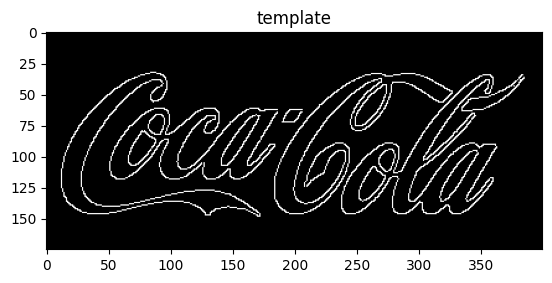

In [16]:
#template
template = cv2.imread('template/pattern.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
templateH, templateW = template.shape[:2]
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB)),plt.title('template')

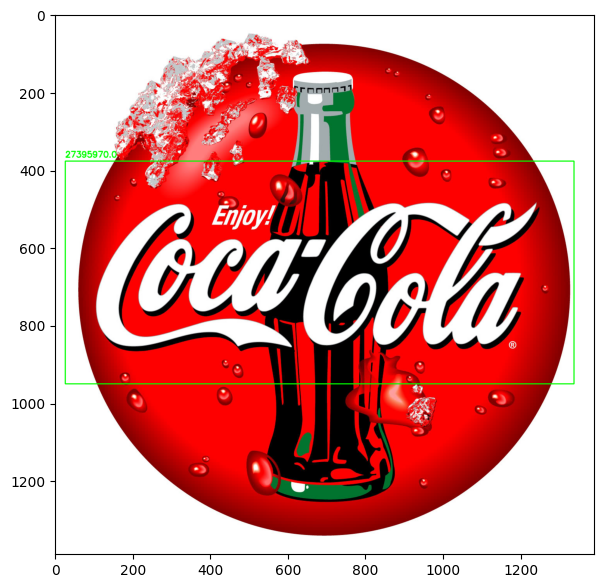

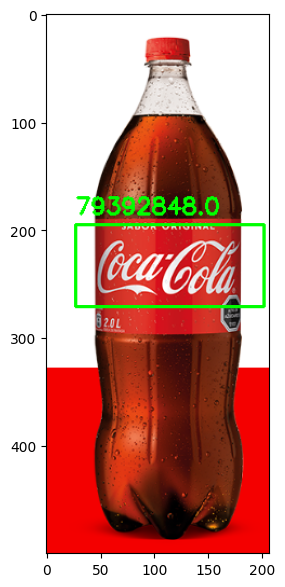

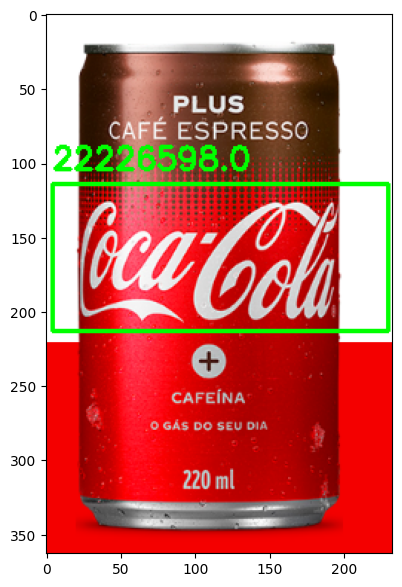

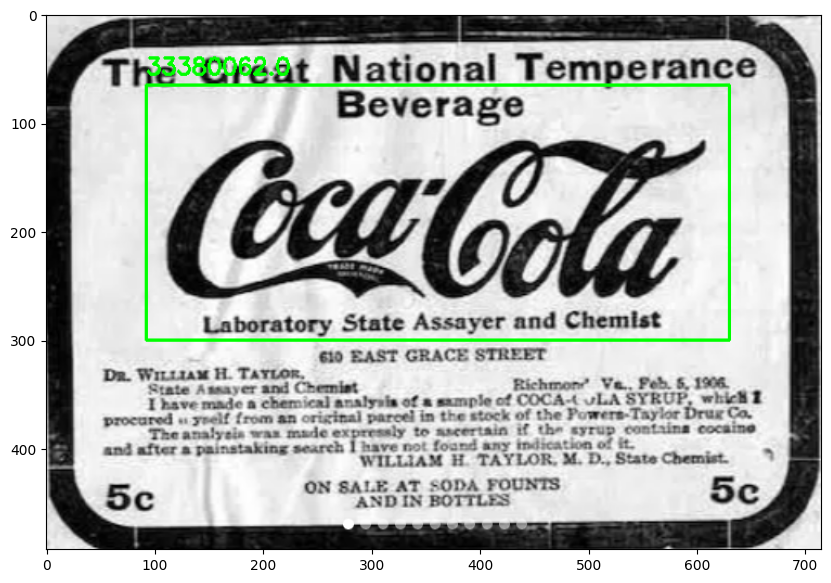

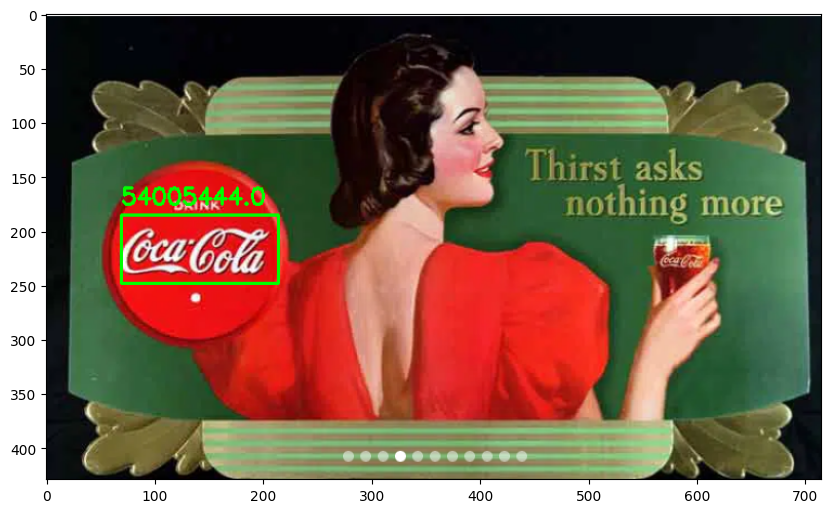

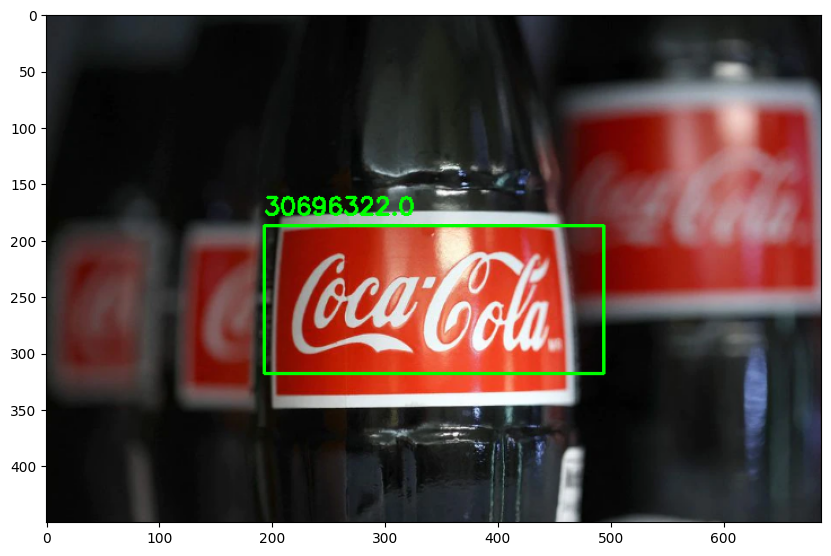

In [151]:
path = 'images/'
imgs = [cv2.imread(path + file.name) for file in Path(path).iterdir() if file.name!='coca_multi.png']

for img in imgs:
    vals = []
    locs = []
    scales = []
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for scale in np.linspace(0.1, 3, 100)[::-1]: 
        resized = imutils.resize(image, width = int(image.shape[1] * scale))
        if(resized.shape[0] < templateH or resized.shape[1] < templateW): break
        edges = cv2.Canny(resized, 100, 200)
        res = cv2.matchTemplate(edges, template, cv2.TM_CCOEFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        vals.append(max_val)
        locs.append(max_loc)
        scales.append(scale)

    i = np.argmax(vals)
    scale = scales[i]
    start, end = np.divide(locs[i], scale)
    (startX, startY) = (int(start), int(end))
    (endX, endY) = (int(start+templateW/scale), int(end+templateH/scale))
    cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
    cv2.putText(img, str(vals[i]), (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    plt.figure(figsize=(10,7))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


#### 2

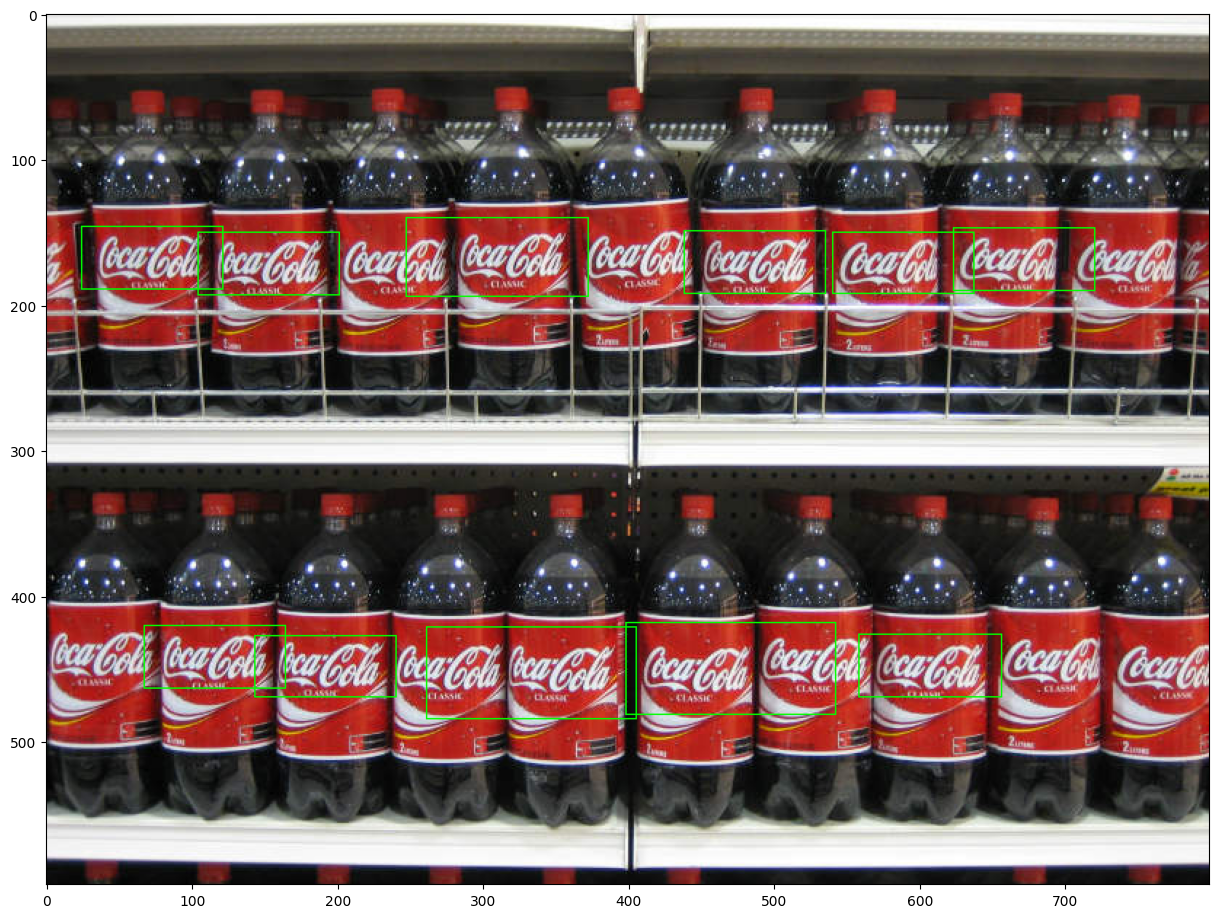

In [153]:
imgMulti = cv2.imread('images/coca_multi.png')
image = cv2.cvtColor(imgMulti, cv2.COLOR_BGR2GRAY)
logos = []
non_repeated = []   
for scale in np.linspace(1, 5, 10)[::-1]:
    resized = imutils.resize(image, width = int(image.shape[1] * scale))
    new_w = int(resized.shape[1])
    new_h = int(resized.shape[0])
    if(resized.shape[0] < templateH or resized.shape[1] < templateW): break
    edges = cv2.Canny(resized, 200, 200)
    res = cv2.matchTemplate(edges, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res > 0.07)
    for pt in zip(*loc[::-1]):
        logos.append((int(pt[0]/scale), int(pt[1]/scale), int((pt[0] + templateW)/scale), int((pt[1] + templateH)/scale))) 
    non_repeated = non_max_suppression(np.array(logos))

for (startX, startY, endX, endY) in non_repeated:
	cv2.rectangle(imgMulti, (startX, startY), (endX, endY), (0, 255, 0), 1)
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(imgMulti, cv2.COLOR_BGR2RGB))